In [1]:
# %load_ext autoreload
# %autoreload 2

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from persim import plot_diagrams

import warnings
warnings.filterwarnings('ignore')

In [36]:
from astropology.constants import PASSBANDS, CLASSES
from astropology.distance import bottleneck_distance
from astropology.distance import wasserstein_distance
from astropology.series import pd_time_series

In [14]:
data_directory = "/home/edgar/astropology/data/"

lcs = pd.read_csv(
    f"{data_directory}/plasticc_train_lightcurves.csv.gz",
)
meta_data = pd.read_csv(
    f"{data_directory}/plasticc_train_metadata.csv.gz",
    index_col="object_id"
)

In [18]:
g_mask = lcs["passband"] == PASSBANDS["g"]
g_df = lcs.loc[g_mask].copy()
g_df.head()
object_ids = g_df["object_id"].unique()

(7848,)

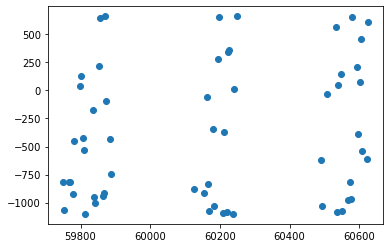

In [40]:
flux = g_df.loc[g_df["object_id"]==object_ids[0], "flux"].to_numpy()
mjd = g_df.loc[g_df["object_id"]==object_ids[0], "mjd"].to_numpy()
plt.scatter(mjd, flux)


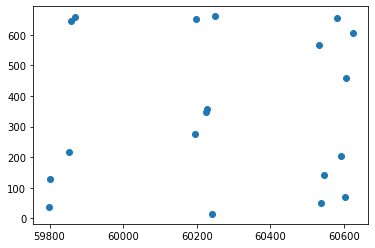

In [43]:
# mask negative values
flux_p = flux[flux >= 0]
mjd_p = mjd[flux >= 0]
plt.scatter(mjd_p, flux_p)

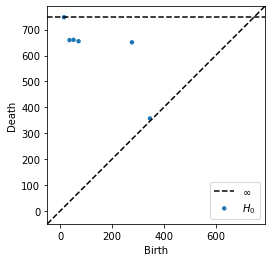

In [45]:
pd_control = pd_time_series(signal=flux_p)
plot_diagrams(pd_control)

## Distance Vs Amplitude

In [82]:
amplitudes = np.logspace(0, 2, 100)

# remove point at infinity before computing distances
pdgm_i = pd_control[np.isfinite(pd_control[:, 1]), :]

wds = np.empty(amplitudes.size)
bds = np.empty(amplitudes.size)

for idx, amplitude in enumerate(amplitudes):
    
    pdgm_j = pd_time_series(amplitude*flux_p)
    pdgm_j = pdgm_j[np.isfinite(pdgm_j[:, 1]), :]

    wds[idx] = wasserstein_distance(pdgm_i, pdgm_j)
    bds[idx] = bottleneck_distance(pdgm_i, pdgm_j)

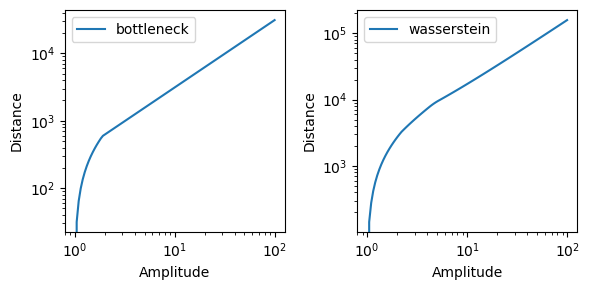

In [85]:
fig, axs = plt.subplots(
    nrows=1, ncols=2, tight_layout=True, figsize=(6, 3)
)
# plt.plot(amplitudes, wds)
axs[0].plot(amplitudes, bds, label="bottleneck")
axs[1].plot(amplitudes, wds, label="wasserstein")

for ax in axs: ax.set_xlabel("Amplitude")
for ax in axs: ax.set_ylabel("Distance")
for ax in axs: ax.legend()
for ax in axs: ax.set_xscale("log"), ax.set_yscale("log")
# plt.xscale("log")
# plt.hlines(
#     y=0,
#     xmin=amplitudes.min(), xmax=amplitudes.max(),
#     colors="red"
#     )
# plt.yscale("log")

## Computational cost

In [17]:
%timeit wasserstein_distance(pdgm_a, pdgms[2])

122 µs ± 1.55 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [18]:
%timeit bottleneck_distance(pdgm_a, pdgms[2])

4.08 ms ± 51.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Cadence

In [ ]:
new_serie = change_cadence(serie, 20/100.)
